# Example Notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

In [3]:
os.chdir('C:\\Users\matus\pysource\portfolio-swissknife')

In [4]:
from portfolio import Portfolio
from risk_model import RiskModel
import estimation as est
import optimization as opt
import plotting
import metrics

## 1. Loading Data and Setup
- We first load the data using the `Portfolio` class and it's associated method `get_prices`. The analysis is restricted by a period required to be set by `set_period`. 

In [102]:
asset_classes = ['SPY', 'BND', 'GLD', '^RUT']
sectors = ['XLK', 'XLY', 'XLB', 'XLC', 'XLE', 'XLU', 'XLF', 'XLV', 'XOP']
random_stocks = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
                 'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',]

pf1 = Portfolio(random_stocks)
pf1.set_period(('2015-01-01', '2021-05-28'))
pf1.get_prices('daily')

[*********************100%***********************]  16 of 16 completed


In [103]:
pf1.set_benchmark('SPY')
pf1.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 2. Performing a Historical Backtest With Fixed Assets

- Then we set the constraints using `set_constraints` and conduct a historical backtest. This will store backtest results in the `Portfolio` class based on the frequency of the rebalance (in trading days), it's estimation period (in trading days) and the model selected in the `models: list`. The supported models are:
 - Equal Weights (EW)
 - Global Minimum Variance (GMV)
 - Equal Risk Contribution (RP)
 - Maximum Diversification Ratio (MDR)
 - Maximum Sharpe Ratio (MSR)
 - Minimum Expected Shortfall (MES)
 - Minimum Maximum Drawdown (MDD)

In [104]:
pf1.set_constraints(default=True) #defaults to long_only full invested portfolio with no leverage
pf1.historical_backtest(models=['EW','RP', 'GMV', 'MDD', 'MDR', 'MES'], frequency=22, estimation_period = 252)

<AxesSubplot:>

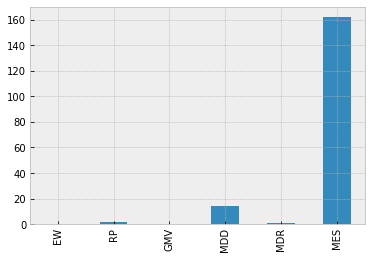

In [105]:
#runtimes
pd.DataFrame(pf1.backtest).loc['opt_time'].plot(kind='bar')

,EW,RP,GMV,MDD,MDR,MES
Average Returns,16.59%,12.77%,9.58%,7.92%,12.86%,21.91%
CAGR,15.89%,12.10%,8.62%,6.52%,12.01%,22.53%
Volatility,40.73%,35.74%,30.96%,28.15%,35.86%,46.80%
Max DD,38.39%,31.29%,31.05%,33.50%,33.49%,28.31%
Skewness,-0.63,-0.34,-0.61,-0.27,-0.75,-0.11
Kurtosis,-2.99,-2.99,-2.99,-3.00,-2.99,-3.00
Sharpe Ratio,0.36,0.30,0.25,0.21,0.30,0.43
Sortino Ratio,0.91,0.80,0.55,0.40,0.76,1.44
Calmar Ratio,-0.43,-0.41,-0.31,-0.24,-0.38,-0.77
Pain Ratio,368.63,317.16,243.41,131.37,287.71,647.68


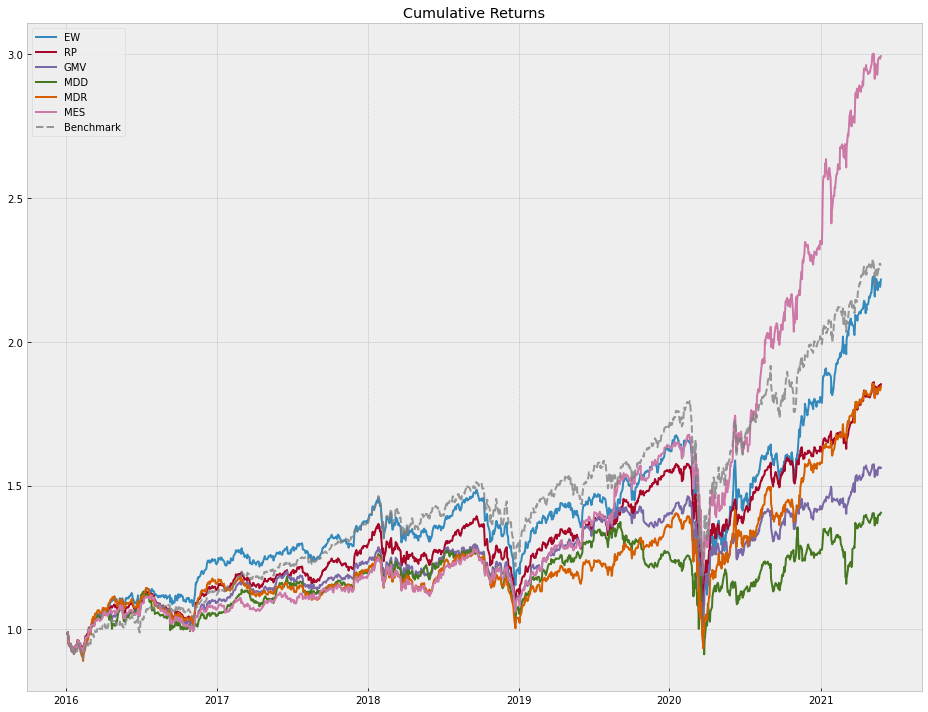

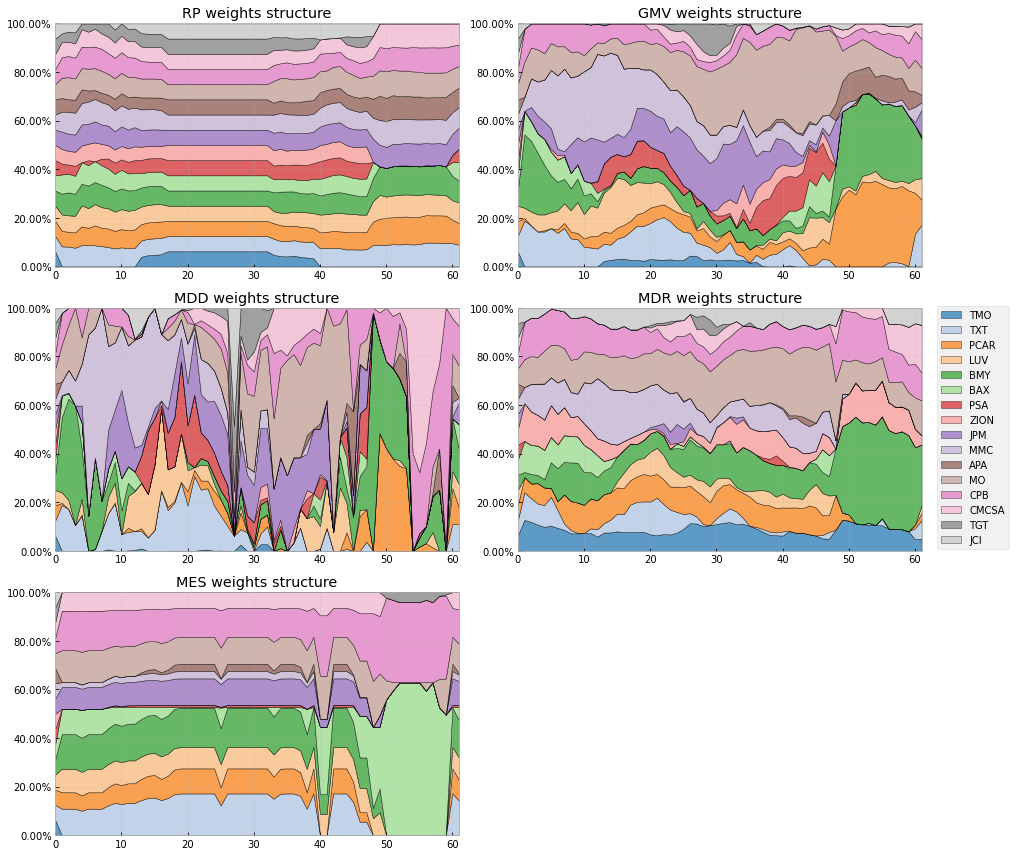

In [106]:
pf1.get_backtest_report(num_rows=3)

## 3. Performing Risk Attribution

In [98]:
factors = ['SPY', 'VLUE', 'SIZE', 'QUAL', 'MTUM', 'USMV']
rm1 = RiskModel(pf1, factors)
rm1.get_prices('daily')

[*********************100%***********************]  6 of 6 completed


In [99]:
y = rm1.portfolio.backtest['EW']['returns']

In [100]:
tparam = est.linear_factor_model(y, rm1.returns)